Original group distribution:
income  <=50K  >50K
sex                
Female   9592  1179
Male    15128  6662

Mean sample weights after reweighing:
income     <=50K      >50K
sex                       
Female  0.848650  6.904368
Male    0.538092  1.221893


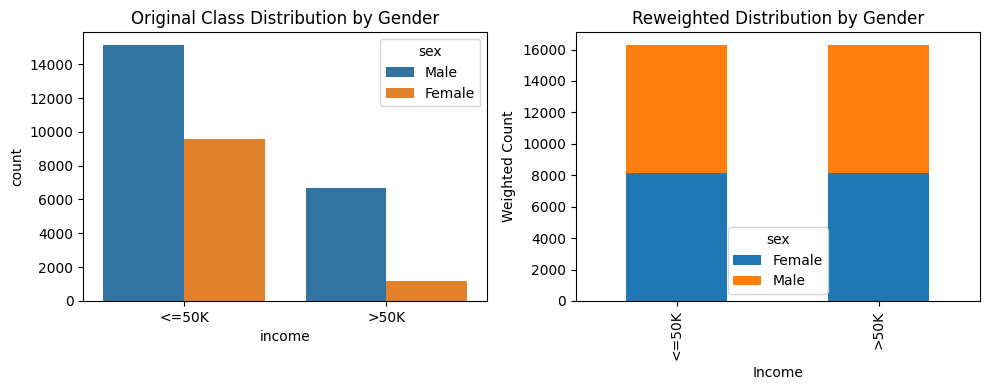

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Adult Income dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=columns, sep=",\s*", engine="python")

# Step 2: View original class-gender distribution
group_counts = df.groupby(['sex', 'income']).size().unstack()
print("Original group distribution:")
print(group_counts)

# Step 3: Apply reweighing (inverse proportional to group sizes)
total_samples = len(df)
group_sizes = df.groupby(['sex', 'income']).size()
group_weights = total_samples / (len(group_sizes) * group_sizes)

# Assign weights to each sample
df['weight'] = df.apply(lambda row: group_weights.loc[row['sex'], row['income']], axis=1)

# Step 4: Show mean weights to confirm balancing
mean_weights = df.groupby(['sex', 'income'])['weight'].mean().unstack()
print("\nMean sample weights after reweighing:")
print(mean_weights)

# Step 5: Optional: Visualize original vs reweighted counts
plt.figure(figsize=(10, 4))

# Original
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='income', hue='sex')
plt.title('Original Class Distribution by Gender')

# Reweighted (sum of weights)
plt.subplot(1, 2, 2)
df.groupby(['income', 'sex'])['weight'].sum().unstack().plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Reweighted Distribution by Gender')
plt.ylabel('Weighted Count')
plt.xlabel('Income')

plt.tight_layout()
plt.show()
